# Super Market Consumer Behavior EDA

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

import customer_probs_matrix

plt.rcParams['figure.figsize'] = (14,6)

![](weather.png)



    Our sales department is interested in a summary of the collected data. Please generate a report including numbers and diagrams. Note that your audience are not data scientists, so take care to prepare insights that are as clear as possible. We are interested in the following:

        Calculate the total number of customers in each section

        Calculate the total number of customers in each section over time

        Display the number of customers at checkout over time

        Calculate the time each customer spent in the market

        Calculate the total number of customers in the supermarket over time.

        Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).



### import the cleaned dataframe from probs_matrix

In [2]:
df_all = customer_probs_matrix.df_all
df_all

,customer_no,location,shopping_day,customer_id,next_location
timestamp,,,,,
2019-09-02 07:03:00,1,dairy,mo,mo_1,checkout
2019-09-02 07:05:00,1,checkout,mo,mo_1,dairy
2019-09-02 07:03:00,2,dairy,mo,mo_2,checkout
2019-09-02 07:06:00,2,checkout,mo,mo_2,dairy
2019-09-02 07:04:00,3,dairy,mo,mo_3,checkout
...,...,...,...,...,...
2019-09-06 21:48:00,1504,checkout,fr,fr_1504,fruit
2019-09-06 21:48:00,1507,dairy,fr,fr_1507,checkout
2019-09-06 21:50:00,1507,checkout,fr,fr_1507,dairy


In [117]:
def groupby_location(df):
    df_eda = pd.DataFrame(df.groupby(['timestamp', 'location'])['customer_id'].count()).unstack(1)
    df_eda.columns = df_eda.columns.get_level_values(-1)
    df_eda.index = pd.DatetimeIndex(df_eda.index)
    df_eda['hour'] = df_eda.index.hour
    df_eda['day'] = df_eda.index.day
    df_eda['day_name'] = df_eda.index.day_name()
    
    return df_eda

In [124]:
def checkout_cus(df):
    df_times = df.groupby(['day_name', 'hour']).sum().drop(columns=['day'])
    df_times['total'] = df_times.sum(axis = 1)

    return df_times
    

In [140]:
df_eda = pd.DataFrame(df_all.groupby(['timestamp', 'location'])['customer_id'].count()).unstack(1)
df_eda.columns = df_eda.columns.get_level_values(-1)
df_eda.index = pd.DatetimeIndex(df_eda.index)
df_eda['hour'] = df_eda.index.hour

df_eda

location,checkout,dairy,drinks,fruit,spices,hour
timestamp,,,,,,
2019-09-02 07:03:00,NaN,2.0,NaN,NaN,NaN,7
2019-09-02 07:04:00,NaN,2.0,NaN,1.0,3.0,7
2019-09-02 07:05:00,2.0,1.0,1.0,NaN,NaN,7
2019-09-02 07:06:00,2.0,2.0,1.0,2.0,1.0,7
2019-09-02 07:07:00,1.0,1.0,1.0,NaN,1.0,7
...,...,...,...,...,...,...
2019-09-06 21:45:00,1.0,NaN,NaN,NaN,NaN,21
2019-09-06 21:46:00,NaN,NaN,NaN,2.0,NaN,21
2019-09-06 21:47:00,2.0,NaN,NaN,1.0,NaN,21


In [141]:
df_eda['checkout'].unique()

array([nan,  2.,  1.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [142]:
df_eda['checkout'] = df_eda['checkout']/3

In [143]:
df_eda

location,checkout,dairy,drinks,fruit,spices,hour
timestamp,,,,,,
2019-09-02 07:03:00,NaN,2.0,NaN,NaN,NaN,7
2019-09-02 07:04:00,NaN,2.0,NaN,1.0,3.0,7
2019-09-02 07:05:00,0.666667,1.0,1.0,NaN,NaN,7
2019-09-02 07:06:00,0.666667,2.0,1.0,2.0,1.0,7
2019-09-02 07:07:00,0.333333,1.0,1.0,NaN,1.0,7
...,...,...,...,...,...,...
2019-09-06 21:45:00,0.333333,NaN,NaN,NaN,NaN,21
2019-09-06 21:46:00,NaN,NaN,NaN,2.0,NaN,21
2019-09-06 21:47:00,0.666667,NaN,NaN,1.0,NaN,21


In [132]:
df_eda8 = pd.DataFrame(df_eda.groupby(['hour'])['checkout'].mean()).unstack(1)
df_eda8

          hour
checkout  7       2.073059
          8       2.574144
          9       1.952790
          10      1.914798
          11      1.718593
          12      1.811321
          13      2.150628
          14      2.194690
          15      1.943396
          16      2.097166
          17      2.288066
          18      2.432432
          19      2.735507
          20      2.084746
          21      1.763006
dtype: float64

In [119]:
df_eda = groupby_location(df_all)
df_eda.columns

Index(['checkout', 'dairy', 'drinks', 'fruit', 'spices', 'hour', 'day',
       'day_name'],
      dtype='object', name='location')

In [161]:
P5 = pd.crosstab(
    df_eda['hour'], 
    df_eda['checkout'], normalize='index')
probs5 = P5.to_dict(orient='index')
for key in probs5.keys():
    probs5[key] = list(probs5[key].values())



In [162]:
P5

checkout,0.333333,0.666667,1.000000,1.333333,1.666667,2.000000,2.333333,2.666667,3.000000
hour,,,,,,,,,
7,0.388128,0.333333,0.155251,0.073059,0.045662,0.000000,0.004566,0.000000,0.000000
8,0.266160,0.311787,0.209125,0.102662,0.053232,0.030418,0.015209,0.011407,0.000000
9,0.450644,0.287554,0.167382,0.060086,0.025751,0.004292,0.004292,0.000000,0.000000
10,0.461883,0.295964,0.139013,0.080717,0.013453,0.008969,0.000000,0.000000,0.000000
11,0.517588,0.331658,0.090452,0.040201,0.015075,0.005025,0.000000,0.000000,0.000000
12,0.476415,0.339623,0.113208,0.042453,0.023585,0.004717,0.000000,0.000000,0.000000
13,0.397490,0.280335,0.179916,0.079498,0.050209,0.004184,0.008368,0.000000,0.000000
14,0.353982,0.345133,0.163717,0.075221,0.035398,0.008850,0.013274,0.004425,0.000000
15,0.448113,0.268868,0.202830,0.051887,0.028302,0.000000,0.000000,0.000000,0.000000


In [163]:
namesList = ['A','B','C','D', 'E', 'F', 'G', 'H', 'I']

In [166]:
P5.columns = namesList

In [167]:
P5

,A,B,C,D,E,F,G,H,I
hour,,,,,,,,,
7,0.388128,0.333333,0.155251,0.073059,0.045662,0.000000,0.004566,0.000000,0.000000
8,0.266160,0.311787,0.209125,0.102662,0.053232,0.030418,0.015209,0.011407,0.000000
9,0.450644,0.287554,0.167382,0.060086,0.025751,0.004292,0.004292,0.000000,0.000000
10,0.461883,0.295964,0.139013,0.080717,0.013453,0.008969,0.000000,0.000000,0.000000
11,0.517588,0.331658,0.090452,0.040201,0.015075,0.005025,0.000000,0.000000,0.000000
12,0.476415,0.339623,0.113208,0.042453,0.023585,0.004717,0.000000,0.000000,0.000000
13,0.397490,0.280335,0.179916,0.079498,0.050209,0.004184,0.008368,0.000000,0.000000
14,0.353982,0.345133,0.163717,0.075221,0.035398,0.008850,0.013274,0.004425,0.000000
15,0.448113,0.268868,0.202830,0.051887,0.028302,0.000000,0.000000,0.000000,0.000000


In [171]:
P5[0]= P5['A']
P5[1]= P5['B'] + P5['C'] + P5['D']
P5[2]= P5['E'] + P5['F'] + P5['G']
P5[3]= P5['H'] + P5['I']
P5

,A,B,C,D,E,F,G,H,I,0,1,2,3
hour,,,,,,,,,,,,,
7,0.388128,0.333333,0.155251,0.073059,0.045662,0.000000,0.004566,0.000000,0.000000,0.388128,0.561644,0.050228,0.000000
8,0.266160,0.311787,0.209125,0.102662,0.053232,0.030418,0.015209,0.011407,0.000000,0.266160,0.623574,0.098859,0.011407
9,0.450644,0.287554,0.167382,0.060086,0.025751,0.004292,0.004292,0.000000,0.000000,0.450644,0.515021,0.034335,0.000000
10,0.461883,0.295964,0.139013,0.080717,0.013453,0.008969,0.000000,0.000000,0.000000,0.461883,0.515695,0.022422,0.000000
11,0.517588,0.331658,0.090452,0.040201,0.015075,0.005025,0.000000,0.000000,0.000000,0.517588,0.462312,0.020101,0.000000
12,0.476415,0.339623,0.113208,0.042453,0.023585,0.004717,0.000000,0.000000,0.000000,0.476415,0.495283,0.028302,0.000000
13,0.397490,0.280335,0.179916,0.079498,0.050209,0.004184,0.008368,0.000000,0.000000,0.397490,0.539749,0.062762,0.000000
14,0.353982,0.345133,0.163717,0.075221,0.035398,0.008850,0.013274,0.004425,0.000000,0.353982,0.584071,0.057522,0.004425
15,0.448113,0.268868,0.202830,0.051887,0.028302,0.000000,0.000000,0.000000,0.000000,0.448113,0.523585,0.028302,0.000000


In [175]:
P5 = P5.drop(columns = namesList)

In [176]:
probs5 = P5.to_dict(orient='index')
for key in probs5.keys():
    probs5[key] = list(probs5[key].values())

In [177]:
probs5

{7: [0.3881278538812785, 0.5616438356164384, 0.0502283105022831, 0.0],
 8: [0.2661596958174905,
  0.623574144486692,
  0.09885931558935361,
  0.011406844106463879],
 9: [0.45064377682403434, 0.5150214592274678, 0.034334763948497854, 0.0],
 10: [0.4618834080717489, 0.515695067264574, 0.022421524663677132, 0.0],
 11: [0.5175879396984925, 0.4623115577889447, 0.020100502512562814, 0.0],
 12: [0.47641509433962265, 0.49528301886792453, 0.02830188679245283, 0.0],
 13: [0.39748953974895396, 0.5397489539748954, 0.06276150627615062, 0.0],
 14: [0.35398230088495575,
  0.584070796460177,
  0.05752212389380531,
  0.004424778761061947],
 15: [0.4481132075471698, 0.5235849056603774, 0.02830188679245283, 0.0],
 16: [0.38866396761133604, 0.562753036437247, 0.048582995951417005, 0.0],
 17: [0.32098765432098764, 0.625514403292181, 0.05349794238683128, 0.0],
 18: [0.277992277992278,
  0.640926640926641,
  0.07722007722007723,
  0.003861003861003861],
 19: [0.2644927536231884,
  0.568840579710145,
  0.1557

In [159]:
P5[0]= P5['A']

P5

checkout,0.333333,0.666667,1.000000,1.333333,1.666667,2.000000,2.333333,2.666667,3.000000,0.000000
hour,,,,,,,,,,
7,0.388128,0.333333,0.155251,0.073059,0.045662,0.000000,0.004566,0.000000,0.000000,0.388128
8,0.266160,0.311787,0.209125,0.102662,0.053232,0.030418,0.015209,0.011407,0.000000,0.266160
9,0.450644,0.287554,0.167382,0.060086,0.025751,0.004292,0.004292,0.000000,0.000000,0.450644
10,0.461883,0.295964,0.139013,0.080717,0.013453,0.008969,0.000000,0.000000,0.000000,0.461883
11,0.517588,0.331658,0.090452,0.040201,0.015075,0.005025,0.000000,0.000000,0.000000,0.517588
12,0.476415,0.339623,0.113208,0.042453,0.023585,0.004717,0.000000,0.000000,0.000000,0.476415
13,0.397490,0.280335,0.179916,0.079498,0.050209,0.004184,0.008368,0.000000,0.000000,0.397490
14,0.353982,0.345133,0.163717,0.075221,0.035398,0.008850,0.013274,0.004425,0.000000,0.353982
15,0.448113,0.268868,0.202830,0.051887,0.028302,0.000000,0.000000,0.000000,0.000000,0.448113


In [160]:
P5[1]= P5.iloc[:, [1]] + P5.iloc[:, [2]]

ValueError: Columns must be same length as key

In [153]:
P5

checkout,0.333333,0.666667,1.000000,1.333333,1.666667,2.000000,2.333333,2.666667,3.000000,0.000000
hour,,,,,,,,,,
7,0.388128,0.333333,0.155251,0.073059,0.045662,0.000000,0.004566,0.000000,0.000000,1
8,0.266160,0.311787,0.209125,0.102662,0.053232,0.030418,0.015209,0.011407,0.000000,1
9,0.450644,0.287554,0.167382,0.060086,0.025751,0.004292,0.004292,0.000000,0.000000,1
10,0.461883,0.295964,0.139013,0.080717,0.013453,0.008969,0.000000,0.000000,0.000000,1
11,0.517588,0.331658,0.090452,0.040201,0.015075,0.005025,0.000000,0.000000,0.000000,1
12,0.476415,0.339623,0.113208,0.042453,0.023585,0.004717,0.000000,0.000000,0.000000,1
13,0.397490,0.280335,0.179916,0.079498,0.050209,0.004184,0.008368,0.000000,0.000000,1
14,0.353982,0.345133,0.163717,0.075221,0.035398,0.008850,0.013274,0.004425,0.000000,1
15,0.448113,0.268868,0.202830,0.051887,0.028302,0.000000,0.000000,0.000000,0.000000,1


In [113]:
probs5

{7: [0.3881278538812785,
  0.3333333333333333,
  0.1552511415525114,
  0.0730593607305936,
  0.045662100456621,
  0.0,
  0.0045662100456621,
  0.0,
  0.0],
 8: [0.2661596958174905,
  0.311787072243346,
  0.20912547528517111,
  0.10266159695817491,
  0.053231939163498096,
  0.030418250950570342,
  0.015209125475285171,
  0.011406844106463879,
  0.0],
 9: [0.45064377682403434,
  0.2875536480686695,
  0.16738197424892703,
  0.060085836909871244,
  0.02575107296137339,
  0.004291845493562232,
  0.004291845493562232,
  0.0,
  0.0],
 10: [0.4618834080717489,
  0.29596412556053814,
  0.13901345291479822,
  0.08071748878923767,
  0.013452914798206279,
  0.008968609865470852,
  0.0,
  0.0,
  0.0],
 11: [0.5175879396984925,
  0.3316582914572864,
  0.09045226130653267,
  0.04020100502512563,
  0.01507537688442211,
  0.005025125628140704,
  0.0,
  0.0,
  0.0],
 12: [0.47641509433962265,
  0.33962264150943394,
  0.11320754716981132,
  0.04245283018867924,
  0.02358490566037736,
  0.0047169811320754

In [50]:
df_eda_times = checkout_cus(df_eda)
df_eda_times

location        checkout  dairy  drinks  fruit  spices  total
day_name  hour                                               
Friday    7         87.0   49.0    53.0   64.0    52.0  305.0
          8        132.0   92.0    72.0  105.0    68.0  469.0
          9         82.0   44.0    38.0   54.0    36.0  254.0
          10        80.0   66.0    45.0   58.0    47.0  296.0
          11        79.0   52.0    48.0   63.0    33.0  275.0
...                  ...    ...     ...    ...     ...    ...
Wednesday 17        98.0   60.0    39.0   70.0    38.0  305.0
          18        97.0   68.0    43.0   65.0    46.0  319.0
          19       192.0  113.0   127.0  140.0   102.0  674.0
          20        85.0   48.0    63.0   59.0    35.0  290.0
          21        56.0   24.0    27.0   25.0    18.0  150.0

[75 rows x 6 columns]

<AxesSubplot:xlabel='day_name', ylabel='spices'>

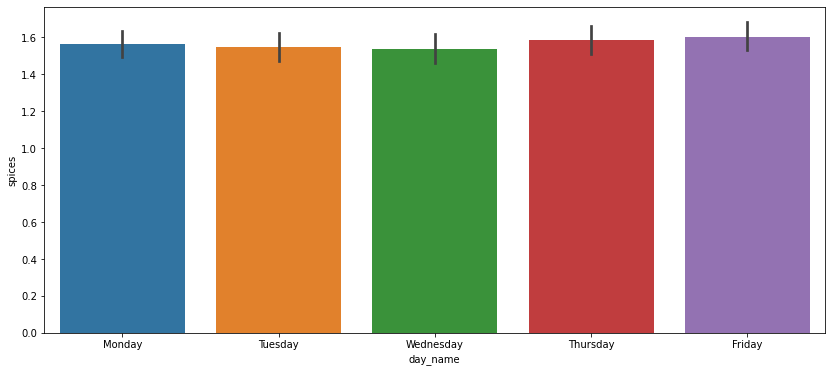

In [6]:
sns.barplot(data = df_eda, x=df_eda.day_name, y=df_eda.spices)

In [7]:
df_eda_times = df_eda.groupby(['day_name', 'hour']).sum().drop(columns=['day'])
df_eda_times['total'] = df_eda_times.sum(axis = 1)
df_eda_times


location        checkout  dairy  drinks  fruit  spices  total
day_name  hour                                               
Friday    7         87.0   49.0    53.0   64.0    52.0  305.0
          8        132.0   92.0    72.0  105.0    68.0  469.0
          9         82.0   44.0    38.0   54.0    36.0  254.0
          10        80.0   66.0    45.0   58.0    47.0  296.0
          11        79.0   52.0    48.0   63.0    33.0  275.0
...                  ...    ...     ...    ...     ...    ...
Wednesday 17        98.0   60.0    39.0   70.0    38.0  305.0
          18        97.0   68.0    43.0   65.0    46.0  319.0
          19       192.0  113.0   127.0  140.0   102.0  674.0
          20        85.0   48.0    63.0   59.0    35.0  290.0
          21        56.0   24.0    27.0   25.0    18.0  150.0

[75 rows x 6 columns]

[Text(0.5, 0, 'time (h)'), Text(0, 0.5, 'total number of customers')]

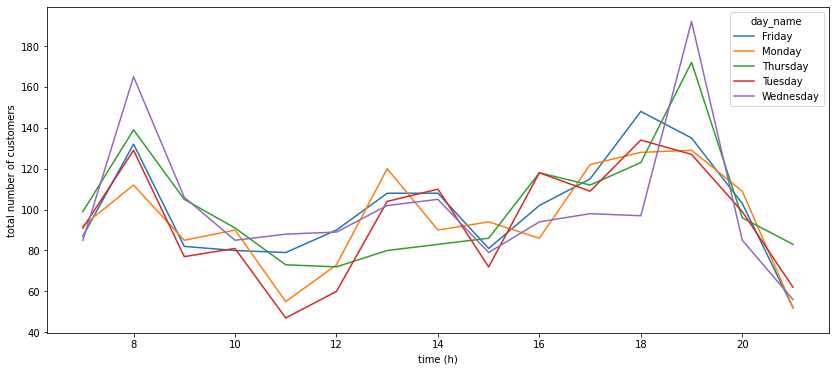

In [8]:
checkout_fig = df_eda_times['checkout'].unstack(0).plot.line()
checkout_fig.set(xlabel='time (h)', ylabel='total number of customers')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


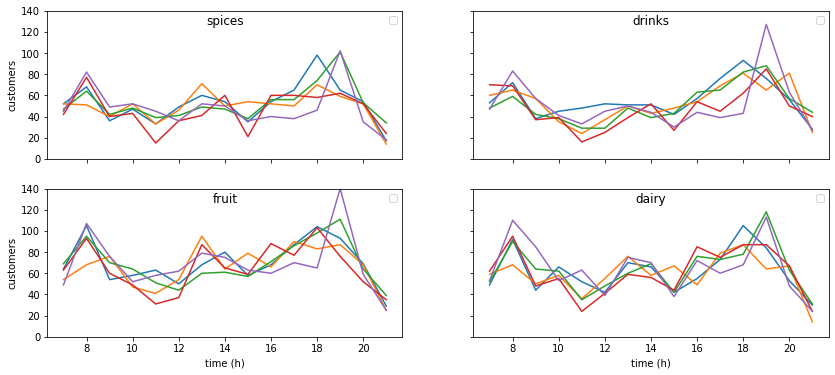

In [9]:
sections_fig, axs = plt.subplots(2, 2)
plt.ylim([0, 140])

axs[0, 0].plot(df_eda_times['spices'].unstack(0))
axs[0, 0].set_title('spices', y=1, pad = -14)
axs[0, 1].plot(df_eda_times['drinks'].unstack(0))
axs[0, 1].set_title('drinks', y=1, pad = -14)
axs[1, 0].plot(df_eda_times['fruit'].unstack(0))
axs[1, 0].set_title('fruit', y=1, pad = -14)
axs[1, 1].plot(df_eda_times['dairy'].unstack(0))
axs[1, 1].set_title('dairy', y=1, pad = -14)


for ax in axs.flat:
    ax.set(xlabel='time (h)', ylabel='customers')

for ax in axs.flat:
    ax.label_outer()

for ax in axs.flat:
    ax.set_ylim([0, 140])
    ax.legend(bbox_to_anchor=(1.0, 1.0))


[Text(0.5, 0, 'time (h)'), Text(0, 0.5, 'total number of customers')]

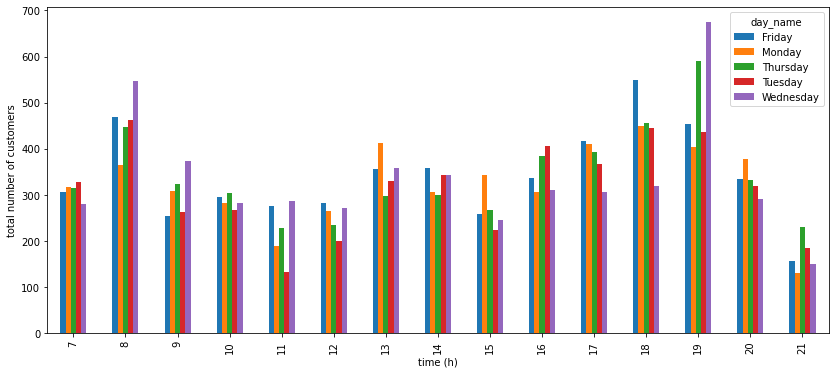

In [10]:
total_fig = df_eda_times['total'].unstack(0).plot.bar()
total_fig.set(xlabel='time (h)', ylabel='total number of customers')

group by again by location and timestamp to count the number of customer

In [65]:
def ave_cus_locations(df):
    df_eda = df.groupby(['timestamp', 'location'])['customer_id'].count().reset_index().melt(['location', 'timestamp']).set_index('timestamp')
    df_eda.index = pd.DatetimeIndex(df_eda.index)
    df_eda['day'] = df_eda.index.day
    df_eda['hour'] = df_eda.index.hour

    return df_eda


In [66]:
def cus_checkout(df):
    df_checkout = df[df['location'] == 'checkout']
    ax_checkout = sns.lineplot(data = df_checkout, x=df_checkout['hour'], y=df_checkout['value'])
    ax_checkout.set(xlabel='time (h)', ylabel='customer number')

    return ax_checkout

In [67]:
def cus_sections(df):
    df_sections = df[df['location'] != 'checkout'].reset_index()
    ax_sections = sns.lineplot(data = df_sections, x=df_sections['hour'], y=df_sections['value'], hue = df_sections['location'])
    ax_sections.set(xlabel='time (h)', ylabel='customer number')

    
    

In [70]:
df_eda = ave_cus_locations(df_all)

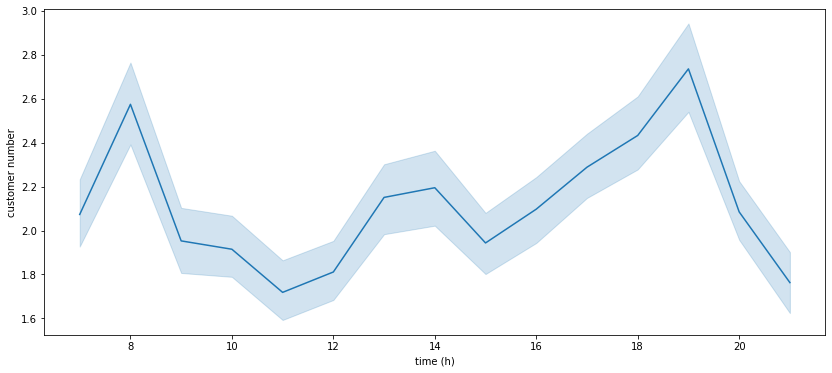

In [71]:
ax_checkout = cus_checkout(df_eda)

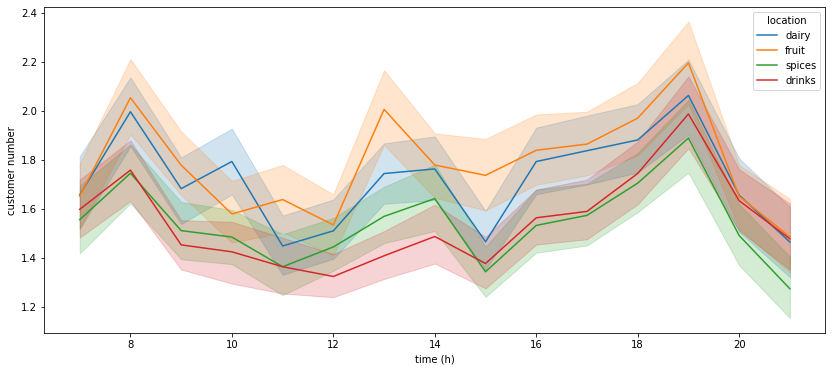

In [72]:
ax_sections = cus_sections(df_eda)

In [17]:
# Q2

df_all['location'].value_counts()

checkout    7417
fruit       5102
dairy       4651
drinks      3889
spices      3739
Name: location, dtype: int64

In [18]:
df_cus = df_all['customer_id'].nunique()
df_cus

7417

In [19]:
df_cum = df_all.groupby(['timestamp', 'location'])['customer_id'].count()

<AxesSubplot:xlabel='timestamp'>

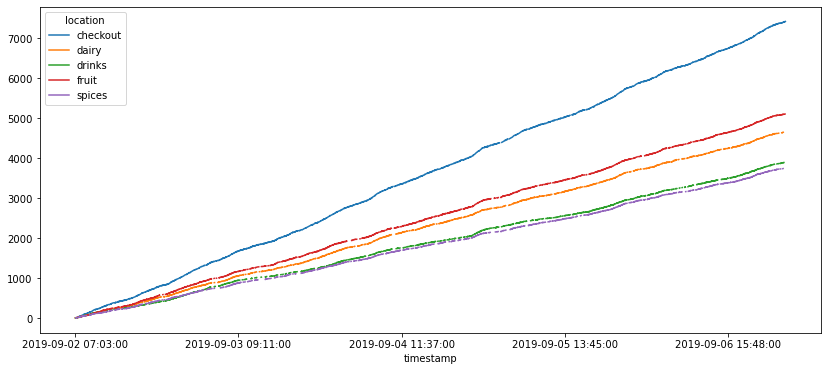

In [20]:
df_cum.unstack().cumsum().plot.line()

### Display the number of customers at checkout over time 

### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [23]:
df_eda_path = pd.DataFrame(df_all.groupby(['location', 'next_location'])['customer_id'].count())
df_eda_path

customer_id
location next_location             
checkout dairy                 2132
         drinks                1138
         fruit                 2800
         spices                1347
dairy    checkout              1825
         drinks                1034
         fruit                  883
         spices                 909
drinks   checkout              2096
         dairy                  106
         fruit                  847
         spices                 840
fruit    checkout              2555
         dairy                 1209
         drinks                 696
         spices                 642
spices   checkout               941
         dairy                 1210
         drinks                1020
         fruit                  568

<AxesSubplot:xlabel='location'>

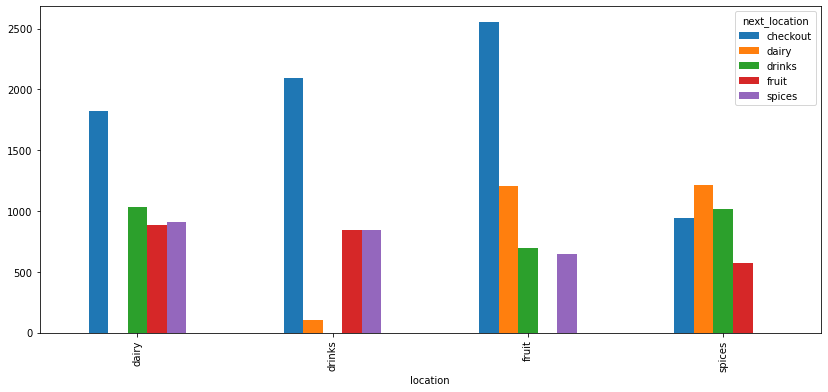

In [24]:
df_eda_path["customer_id"].unstack().drop('checkout').plot.bar()

[]

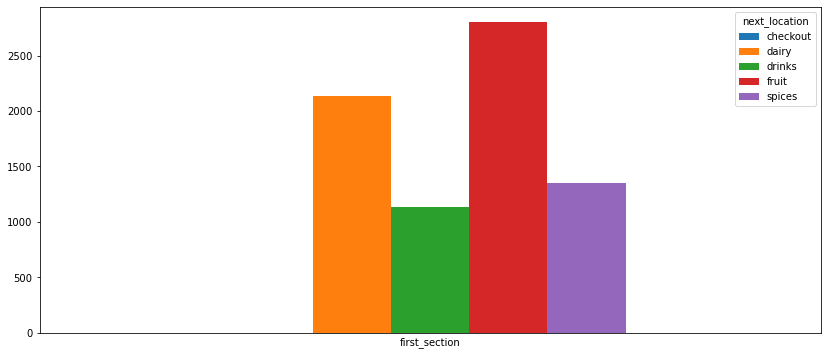

In [25]:
# show the customers first location distribution. (transition from checkout of cus_x to next location of cus_x+1)

gr = df_eda_path["customer_id"].unstack().drop(['spices', 'fruit', 'drinks', 'dairy']).plot.bar()
plt.xlabel('first_section')
gr.axes.xaxis.set_ticks([])

### find the time spent in each section

In [26]:
df_all2 = df_all.copy()

In [31]:
df_all2.index = pd.DatetimeIndex(df_all2.index)

In [32]:
df_all2['duration_min'] = df_all2.index.to_series().diff().shift(-1)

In [33]:
df_all2['duration_min'] = df_all2['duration_min'].dt.seconds.div(60, fill_value=0)

In [34]:
df_all2

,customer_no,location,shopping_day,customer_id,next_location,duration_min
timestamp,,,,,,
2019-09-02 07:03:00,1,dairy,mo,mo_1,checkout,2.0
2019-09-02 07:05:00,1,checkout,mo,mo_1,dairy,1438.0
2019-09-02 07:03:00,2,dairy,mo,mo_2,checkout,3.0
2019-09-02 07:06:00,2,checkout,mo,mo_2,dairy,1438.0
2019-09-02 07:04:00,3,dairy,mo,mo_3,checkout,2.0
...,...,...,...,...,...,...
2019-09-06 21:48:00,1504,checkout,fr,fr_1504,fruit,0.0
2019-09-06 21:48:00,1507,dairy,fr,fr_1507,checkout,2.0
2019-09-06 21:50:00,1507,checkout,fr,fr_1507,dairy,1438.0


In [35]:
df_dur = pd.DataFrame(df_all2.groupby(['location'])['duration_min'].mean())
df_dur

,duration_min
location,
checkout,1298.357692
dairy,3.810793
drinks,2.490872
fruit,2.481968
spices,1.672640


In [36]:
df_dur = df_dur.iloc[1:]
df_dur

,duration_min
location,
dairy,3.810793
drinks,2.490872
fruit,2.481968
spices,1.672640


Text(0, 0.5, 'average time spent (min)')

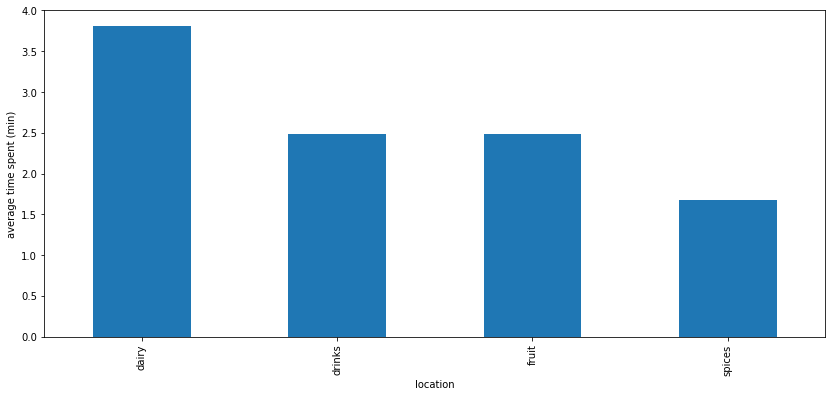

In [37]:
pl = df_dur["duration_min"].plot.bar()
plt.ylabel('average time spent (min)')


# Analyze the simulated data

In [102]:
df_names = ['customer_simulation']
df_sim = customer_probs_matrix.read_csv()
df_all_sim= customer_probs_matrix.clean_data(df_sim)
df_all_sim

,customer_no,location,shopping_day,customer_id,next_location
timestamp,,,,,
2022-05-04 07:02:00,1,dairy,cu,cu_1,drinks
2022-05-04 07:04:00,1,drinks,cu,cu_1,spices
2022-05-04 07:06:00,1,spices,cu,cu_1,checkout
2022-05-04 07:08:00,1,checkout,cu,cu_1,dairy
2022-05-04 07:02:00,2,dairy,cu,cu_2,spices
...,...,...,...,...,...
2022-05-04 21:58:00,694,drinks,cu,cu_694,checkout
2022-05-04 22:00:00,694,checkout,cu,cu_694,dairy
2022-05-04 21:58:00,695,dairy,cu,cu_695,spices


In [103]:
df_eda_sim = ave_cus_locations(df_all_sim)

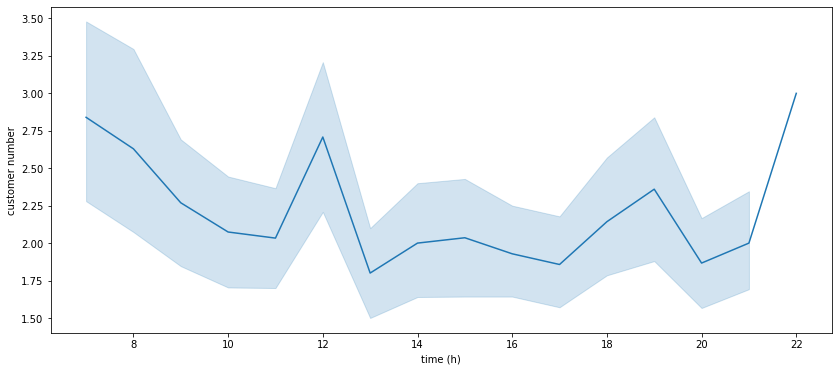

In [104]:
ax_checkout_sim = cus_checkout(df_eda_sim)

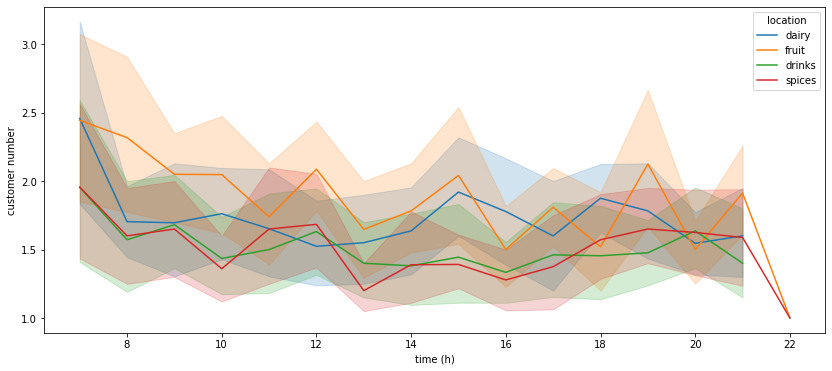

In [105]:
ax_sections_sim = cus_sections(df_eda_sim)

In [77]:
minutes = 2
minutes = minutes + 2
hours = 7
hours = hours + minutes/60

In [78]:
hours

7.066666666666666